In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [50]:
Customer_data = pd.read_csv('E:/Tasks/Xiaomi/marketing_campaign.csv', delimiter='\t')
Customer_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [51]:
list(Customer_data.columns)

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [52]:
Customer_data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [53]:
#drop ID since it is of no use for segmentation
Customer_data.drop("ID", axis = 1, inplace=True)
#convert Dt_Customer to datetime
Customer_data["Dt_Customer"] = pd.to_datetime(Customer_data["Dt_Customer"])
#since the Dt_Customer is the date on which a customer enrolled, 
#it should be converted to # days before 21-12-2016 (I just choose this day randomly)
Customer_data["N_Dt_Customer"] = (pd.to_datetime("31-12-2016") - Customer_data["Dt_Customer"]).dt.days
#also, converting Year_Birth to Age 
Customer_data["Age"] = 2016 - Customer_data["Year_Birth"] 

C:\Users\hp\anaconda3\envs\Tasks\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\envs\Tasks\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\envs\Tasks\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

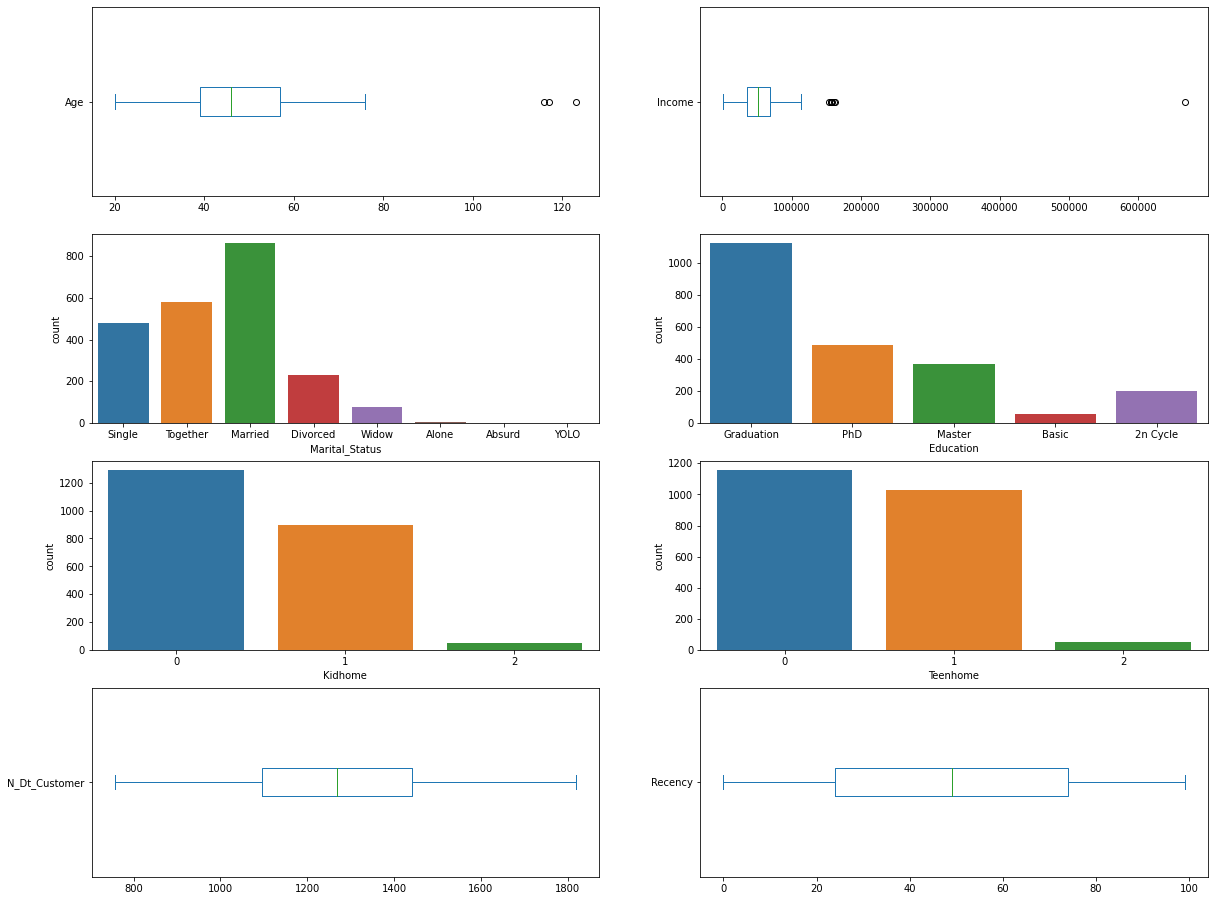

In [54]:
#checking out people features
fig, ax = plt.subplots(4,2, figsize = (20,16))
Customer_data["Age"].plot(kind="box", vert=False, ax=ax[0,0])
Customer_data["Income"].plot(kind="box", vert=False, ax=ax[0,1])
sns.countplot("Marital_Status", data=Customer_data, ax=ax[1,0])
sns.countplot("Education", data=Customer_data, ax=ax[1,1])
sns.countplot("Kidhome", data=Customer_data, ax=ax[2,0])
sns.countplot("Teenhome", data=Customer_data, ax=ax[2,1])
Customer_data["N_Dt_Customer"].plot(kind="box", vert=False, ax=ax[3,0])
Customer_data["Recency"].plot(kind="box", vert=False, ax=ax[3,1])
plt.show()

From the chart above it can be seen that:

    *Year_Birth & Income have some outliers to be cleaned*
    *In Marital_Status & Education Some answers need to be cleaned and regrouped*
Here I want to add NumDealsPurchases and a column representing the total number of goods spent in the last 2 years TotalComsumption before clustering

C:\Users\hp\anaconda3\envs\Tasks\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


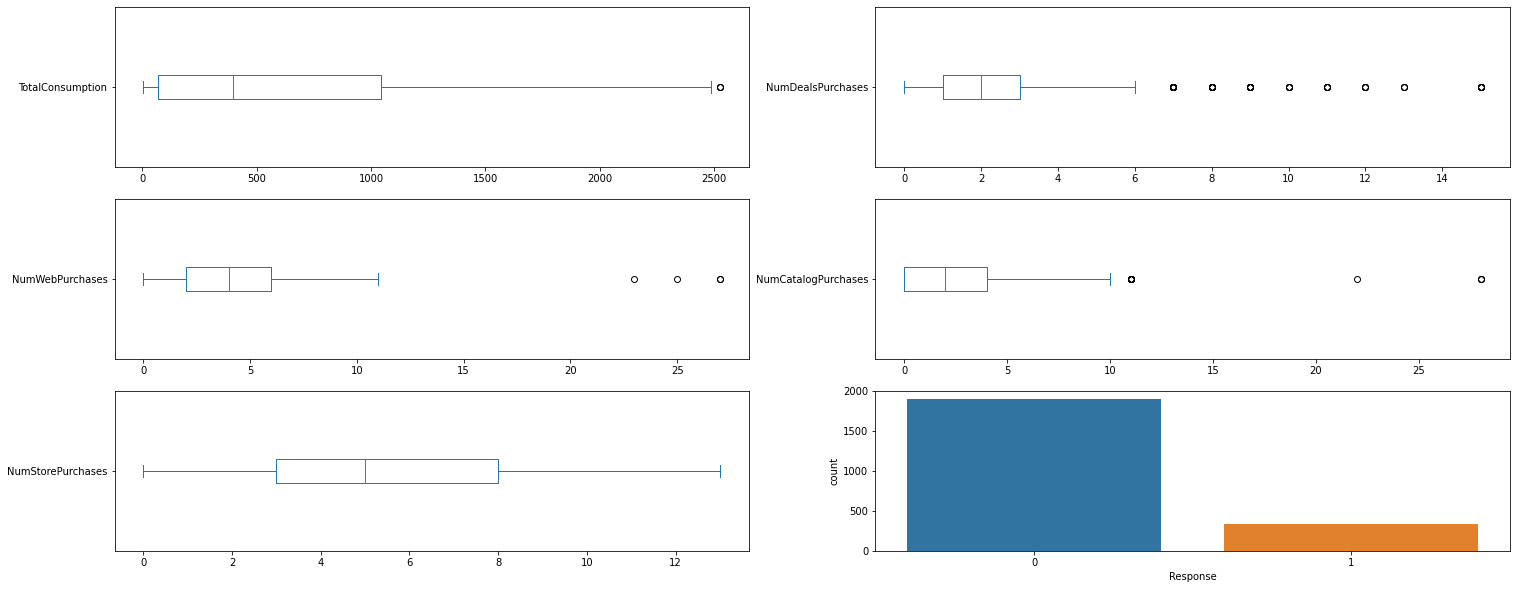

In [55]:
Customer_data["TotalConsumption"] = Customer_data[["MntWines","MntFruits","MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds" ]].sum(axis=1)

fig, ax = plt.subplots(3,2, figsize=(25,10))
Customer_data["TotalConsumption"].plot(kind="box", vert=False, ax=ax[0,0])
Customer_data["NumDealsPurchases"].plot(kind="box", vert=False, ax=ax[0,1])
Customer_data["NumWebPurchases"].plot(kind="box", vert=False, ax=ax[1,0])
Customer_data["NumCatalogPurchases"].plot(kind="box", vert=False, ax=ax[1,1])
Customer_data["NumStorePurchases"].plot(kind="box", vert=False, ax=ax[2,0])
sns.countplot("Response", data=Customer_data, ax=ax[2,1])
plt.show()

In [56]:
#Replace outliers with mean value of each feature
#Year_birth
Q1 = Customer_data['Age'].quantile(0.25)
Q3 = Customer_data['Age'].quantile(0.75)
IQR = Q3 - Q1

for index in Customer_data[Customer_data["Age"] > Q3 + 1.5*IQR].index:
    Customer_data.loc[index,"Age"] = int(Customer_data["Age"].mean())

#Income
Q1_ = Customer_data['Income'].quantile(0.25)
Q3_ = Customer_data['Income'].quantile(0.75)
IQR_ = Q3_ - Q1_
mean_income = Customer_data["Income"].mean()
for index in Customer_data[Customer_data["Income"] > Q3_ + 1.5*IQR_].index:
    Customer_data.loc[index, "Income"] = mean_income

#also, fill NA values of Income with mean
Customer_data["Income"].fillna(mean_income, inplace=True)

# #NumDealsPurchases
# # I replace outliers with Q3 values since that means these outliers represents those customers who conduct more DealsPurchases than avg.
# Q1__ = Customer_data['NumDealsPurchases'].quantile(0.25)
# Q3__ = Customer_data['NumDealsPurchases'].quantile(0.75)
# IQR__ = Q3__ - Q1__
# for index in Customer_data[Customer_data["NumDealsPurchases"] > Q3__ + 1.5*IQR__].index:
#     Customer_data.loc[index, "NumDealsPurchases"] = Q3__

#clean up categorical variables
#Marital_Status
Customer_data["Marital_Status"].replace(dict.fromkeys(["Divorced", "Alone", "Absurd", "Widow", "YOLO"], 'Single'),
    regex=True, inplace=True)
Customer_data["Marital_Status"].replace(dict.fromkeys(["Together", "Married"], "Relationship"),
    regex=True, inplace=True)
#Education
Customer_data['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate',
                                             'Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'}, inplace=True)

### Clustering
Here I use these features: "Age","Income", "Marital_Status", "Education", "Kidhome", "Teenhome", "N_Dt_Customer", "TotalConsumption", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "Response" in KMeans Clustering algorithm

In [57]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [58]:
X = Customer_data[["Age","Income", "Marital_Status", "Education", "Kidhome", "Teenhome", "N_Dt_Customer", "TotalConsumption"
        , "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "Response"]].copy()

KMeans clustering with Simple Encoder for categorical variables

In [59]:
from sklearn.preprocessing import OneHotEncoder
X_label = X.copy()

In [60]:
encode = OneHotEncoder()
en = encode.fit_transform(X_label[["Kidhome", "Teenhome"]]).toarray()
t = encode.get_feature_names(["Kidhome", "Teenhome"])
X_label = pd.concat((X_label,pd.DataFrame(en, columns=t)), axis=1)
X_label["Marital_Status"] = X_label["Marital_Status"].factorize(sort=True)[0]
X_label["Education"] = X_label["Education"].factorize(sort=True)[0]
X_label.drop(["Kidhome", "Teenhome"],axis=1, inplace=True)

C:\Users\hp\anaconda3\envs\Tasks\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


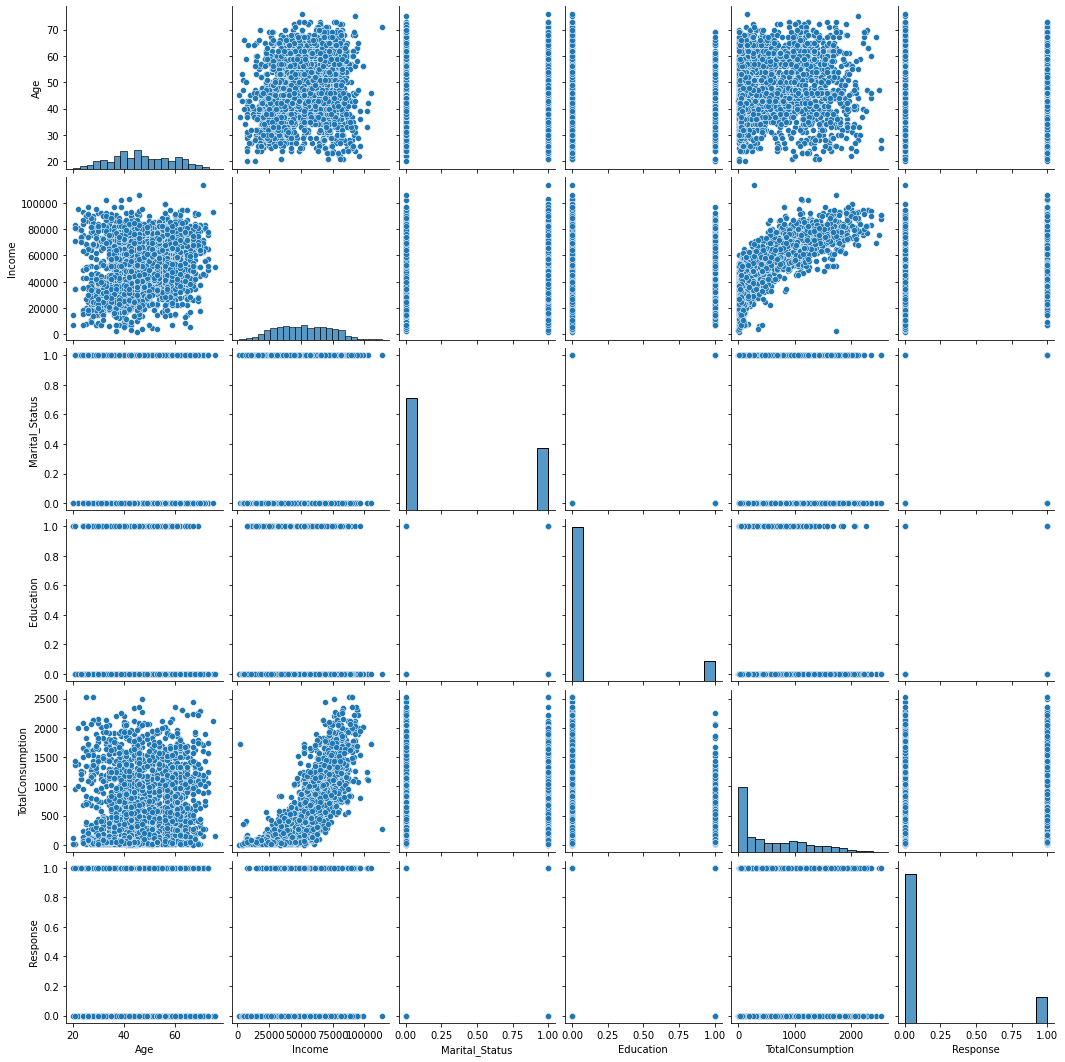

In [61]:
# pair = X_label["Age","Income", "Marital_Status", "Education", "TotalConsumption", "Response"].copy()
sns.pairplot(X_label[["Age","Income", "Marital_Status", "Education", "TotalConsumption", "Response"]])

In [64]:
#normalize data
scaler = MinMaxScaler()
X_label = scaler.fit_transform(X_label)
#fit to model
distortion = []
silhouette = []
for k in range(2,10):
    kmeans_label = KMeans(n_clusters=k, max_iter=1000, random_state=203)
    kmeans_label.fit(X_label)
    distortion.append(kmeans_label.inertia_)
    silhouette.append(silhouette_score(X_label, kmeans_label.fit_predict(X_label)))

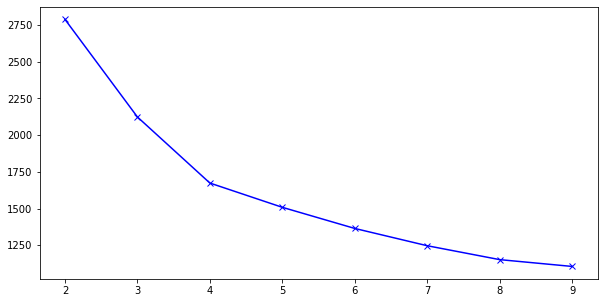

Silhouette Score for k = 2 is 0.2985728756442159
Silhouette Score for k = 3 is 0.3203731032982036
Silhouette Score for k = 4 is 0.37973499517423426
Silhouette Score for k = 5 is 0.3666262008323996
Silhouette Score for k = 6 is 0.3567026502865759
Silhouette Score for k = 7 is 0.35161929719206614
Silhouette Score for k = 8 is 0.3548881009181466
Silhouette Score for k = 9 is 0.36662522678804316
The highest silhouette score is k = 4


In [65]:
#plot distortion
plt.figure(figsize = (10,5))
plt.plot(range(2,10), distortion, 'bx-')
plt.show()
for index, score in enumerate(silhouette):
    print(f"Silhouette Score for k = {index+2} is {score}")
best_K = silhouette.index(max(silhouette))+2
print(f"The highest silhouette score is k = {best_K}")

So the number of clusters should be 4

In [66]:
model = KMeans(n_clusters = best_K)
X["Label"] = model.fit_predict(X_label)

Now let's try to interpret the four clusters that we found

Our distribution of labels

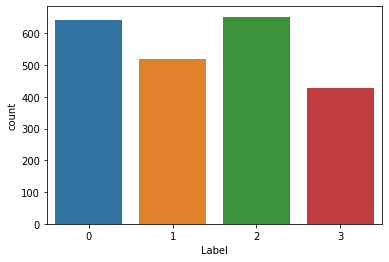

In [67]:
sns.countplot(x="Label", data=X)
plt.show()

In [68]:
num = ["Age","Income", "N_Dt_Customer", "TotalConsumption"
        , "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]
cat = ["Education", "Marital_Status", "Response","Kidhome", "Teenhome",]

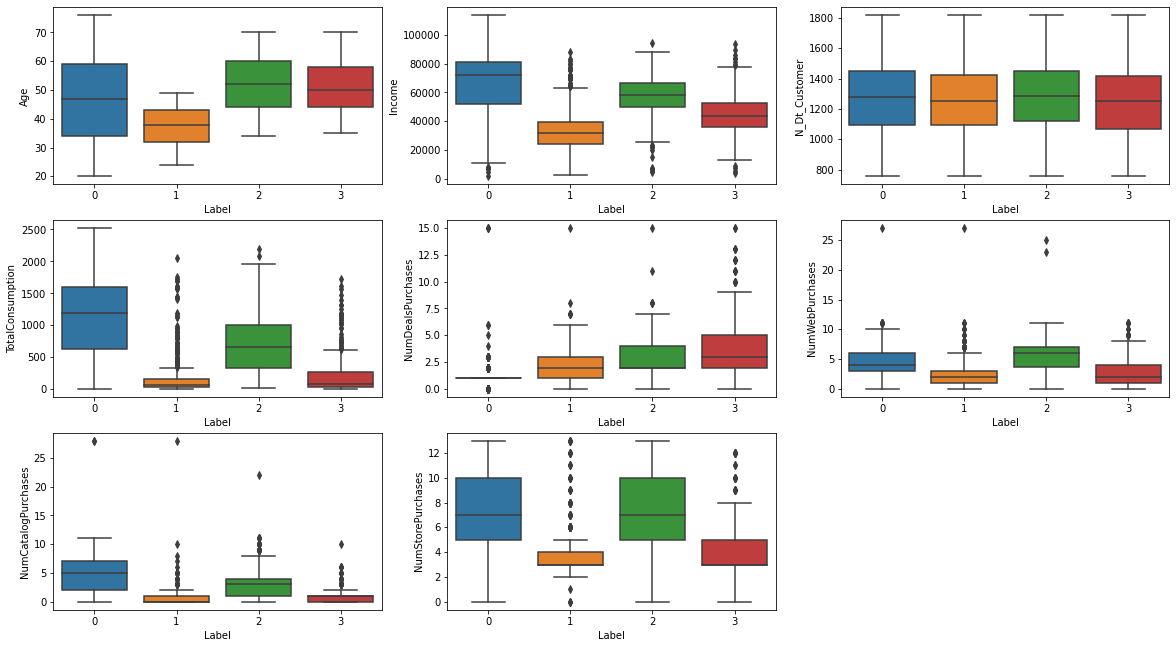

In [69]:
fig = plt.figure(figsize=(20,15))
total_subs = len(num)
cols = 3
rows = total_subs//cols
rows += total_subs%cols
position = range(1, total_subs+1)
for index,column in enumerate(num):
    ax = fig.add_subplot(rows, cols, position[index])
    sns.boxplot(y=column, x="Label", data=X, ax=ax)
plt.show()

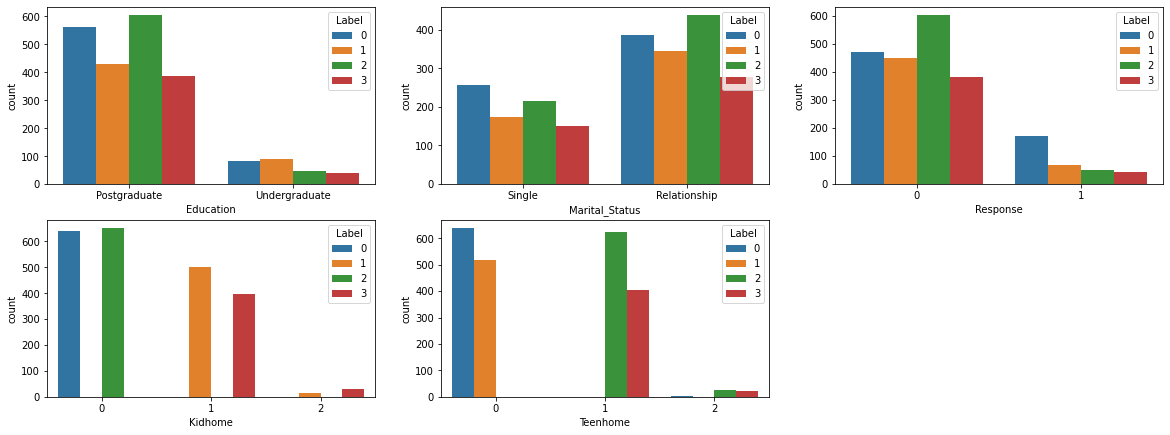

In [70]:
fig = plt.figure(figsize=(20,15))
total_subs = len(num)
cols = 3
rows = total_subs//cols
rows += total_subs%cols
position = range(1, total_subs+1)
for index,column in enumerate(cat):
    ax = fig.add_subplot(rows, cols, position[index])
    sns.countplot(x=column, hue="Label", data=X, ax=ax)
plt.show()

The table below sums up some prominent characteristics of each Group

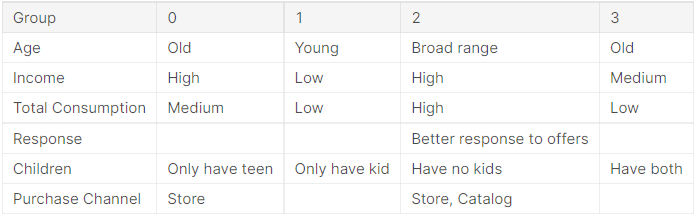

### Conclusion

The customers can be divided into 4 groups:

   * Group 0: Old customers with high income, but low on consumption. Their purchase channel is mostly through stores
   * Group 1: Young customers with low income and low consumption
   * Group 2: Customers with high income and consumption, these customers don't have kid and are better response to offers. Their purchase channel is mostly through stores and catalog
   * Group 3: Old customers with medium income, have both kids and teens and low consumption